### some feature selection

### Makin models from all the features

I make sure that columns are the right data types and fill nan values with the appropriate values. I also made season and reno columns. season is categorical and contains what season the sale happened in. reno is 1 for has been renovated and 0 for hasn't been renovated. I did a linear regression with and without a polynomial features. I also tried SGD and decision tree. I think that SGD and decision tree aren't better and take a while to run. I'm just gonna stick with the first two. I made an error before loading the other models to the notebook stops running after the polynomial features linear regression.

### Feature Selection

This new model uses some feature selection to pick the best features to use in the model. I also tried imputing missing values and using polynomial features. I didn't expect imputing to do anything because I had already replaced missing values. I don't think that I am using polynomial features correctly and that is why it looks like it isn't doiing anything.

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [2]:
#read in the cleaned df and set col index
df = pd.read_csv('cleaned_df',index_col=0)
df_med = pd.read_csv('mediandf.csv',index_col=0)
df_med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21577 entries, 0 to 21596
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median_by_zip  21577 non-null  float64
dtypes: float64(1)
memory usage: 337.1 KB


In [3]:
# drop_rows = df['price'].sort_values(ascending=False)[:300]
# df.drop(drop_rows.index,axis=0,inplace=True)


In [4]:
#drop id col
df.drop('id',axis=1,inplace=True)
df = df.join(df_med)
#waterfront time grade
df['water_times_grade'] = df['waterfront'] * df['grade']

In [5]:
df.columns


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'reno', 'price_per_sqft', 'year', 'day',
       'month', 'season', 'sqft_living_times_grade', 'condition_div_grade',
       'sqft_living_sq', 'bathrooms_sq', 'median_by_zip', 'water_times_grade'],
      dtype='object')

In [6]:
#import model packages
#fir the basic model
#for testing
from sklearn.model_selection import cross_val_score
#adding some more model testing
from sklearn.model_selection import KFold
#train test split
from sklearn.model_selection import train_test_split
#scoring
#feature elimination
from sklearn.feature_selection import RFE
#scoring
from sklearn.metrics import mean_squared_error
#trying some polynomial features



In [7]:
#defining which values are categorical or not
#'bedrooms','floors','condition','zipcode','season','view'
categoricals = ['view', 'zipcode','reno']

continuous = ['price','bedrooms', 'sqft_lot', 'floors',
             'sqft_above','sqft_basement', 'yr_built', 'lat', 'long',
             'sqft_living15', 'sqft_lot15','month', 'condition_div_grade',
             'bathrooms_sq', 'median_by_zip','water_times_grade']

df_cont = df[continuous]


In [8]:
#compare different scalers
#im going to make a function to take the output of scalers and git back the score
#then do it for multiple scalers

In [9]:
#one hot encode the categoricals
df_ohe = pd.get_dummies(df[categoricals])
#combine the data into one frame
preprocessed = pd.concat([df_cont, df_ohe],axis=1)
#make feature set by dropping price
X = preprocessed.drop('price',axis=1)

In [10]:
#scale here
def scales(scaler,X):
    #suppress warnings
    import warnings
    
    from sklearn.exceptions import DataConversionWarning
    
    warnings.filterwarnings(action='ignore', category=RuntimeWarning)
                        
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import minmax_scale
    from sklearn.preprocessing import MaxAbsScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import RobustScaler
    from sklearn.preprocessing import Normalizer
    from sklearn.preprocessing import QuantileTransformer
    from sklearn.preprocessing import PowerTransformer
    '''choose which scaler to use. Pass the name and features to scale'''
    
    if scaler == 'standard':
        standard = StandardScaler().fit_transform(X)
        choice = standard

    elif scaler == 'minmax':
        minmax = MinMaxScaler().fit_transform(X)
        choice = minmax
    elif scaler == 'maxabs':
        maxabs = MaxAbsScaler().fit_transform(X)
        choice = maxabs
    elif scaler == 'robust':
        robust = RobustScaler().fit_transform(X)
        choice = robust
    elif scaler == 'norm':
        norm = Normalizer().fit_transform(X)
        choice = norm
    elif scaler == 'quant':
        quant = QuantileTransformer().fit_transform(X)
        choice = quant
    elif scaler == 'power':
        power = PowerTransformer().fit_transform(X)
        choice = power
    elif scaler == 'none':
        choice = X
        
    choice = pd.DataFrame(choice)
    return choice

In [11]:

#make target set
y = preprocessed['price']

def model_train(scaled_X,y,n_feats,estimator):

    #make train test split
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, random_state=1)
    #ini regression model
    #Apply polynomial features
    #comment these line out to skip
    # X_train = poly.fit_transform(X_train,y_train)
    # X_test = poly.fit_transform(X_test,y_test)

    #use the best features
    #selector = RFE(estimator, n_features_to_select=n_feats, step=1)
    
    #selector = selector.fit(X_test, y_test)
    selector = estimator.fit(X_test, y_test)
    
    #get predicted values
    y_hat_train = selector.predict(X_train)
    y_hat_test = selector.predict(X_test)
    
    return estimator, y_hat_train, y_hat_test, y_train, y_test, X_test, X_train

In [12]:
def model_score(estimator,y_hat_train,y_hat_test,y_train,y_test,X_test,X_train,n_splits=5):
    from sklearn.metrics import r2_score
    #r2 scoring
    split_score = r2_score(y_test, y_hat_test)
    r2_score = split_score.mean()
    #RMSE scoring
    RMSE_test = mean_squared_error(y_test,y_hat_test,squared=False)
    RMSE_train = mean_squared_error(y_train,y_hat_train,squared=False)
    RMSE_diff = abs(RMSE_test - RMSE_train)
    # RMSE_test,RMSE_train
    #cross val scoring using KFold splits
    cv = KFold(n_splits=n_splits,shuffle=True)
    cv_score = cross_val_score(estimator,X_test,y_test,scoring='r2',cv=cv)
    cv_scores = cv_score.mean()
    
    #plot here
    coefs = estimator.coef_
    
    
    
    
    return round(r2_score,3),round(RMSE_diff,3),round(cv_scores,3),round(RMSE_test,3),round(RMSE_train,3),coefs

In [13]:
print(f'There are {len(X.columns)} features to choose from')

There are 18 features to choose from


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
#set to degree 2, 3 is too slow
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

#'none',standard','minmax','maxabs','robust','norm','quant','power'

scalers = ['standard']
estimators = ['linreg']

poly = PolynomialFeatures(degree = 2,interaction_only=True)
poly_Features = False

if poly_Features == True:    
    X = poly.fit_transform(X)

for estimator in estimators:
        
        
        if estimator == 'linreg':
            est = LinearRegression(n_jobs=4)
        elif estimator == 'sgd':
            est = SGDRegressor()
        elif estimator == 'ridge':
            est = Ridge(alpha=0.4,max_iter=1000)
        elif estimator == 'lasso':
            est = Lasso(alpha=0.1,max_iter=1000,tol=10000)
        elif estimator == 'kn':
            est = KNeighborsRegressor(n_neighbors=12,algorithm='kd_tree',weights='distance',leaf_size=45,p=2,n_jobs=4)
        elif estimator == 'tree':
            est = tree.DecisionTreeRegressor(max_features='auto')
        for scaler in scalers:
            scaled_X = scales(scaler,X)

            model_trains = model_train(scaled_X,y,10,est)


            model_scores = model_score(model_trains[0],
                                   model_trains[1],
                                   model_trains[2],
                                   model_trains[3],
                                   model_trains[4],
                                   model_trains[5],5)
            coefficients = list(zip(X.columns,model_scores[5]))
            print(f'Model used: {est}\n'
              f'Scaler used: {scaler}\n'
              f'Model scores are:\n' f'r2_score: {model_scores[0]}\n' 
              f'RMSE differece: {model_scores[1]}\n'
              f'Test RMSE: {model_scores[4]}\n'
              f'Train RMSE: {model_scores[3]}\n'  
              f'Cross Val Scores: {model_scores[2]}\n\n')
              

Model used: LinearRegression(n_jobs=4)
Scaler used: standard
Model scores are:
r2_score: 0.697
RMSE differece: 2853.963
Test RMSE: 150324.153
Train RMSE: 147470.19
Cross Val Scores: 0.691




In [15]:
coef_hist = pd.DataFrame(coefficients)
coef_hist

,0,1
0,bedrooms,-18608.217786
1,sqft_lot,5759.687838
2,floors,23320.898199
3,sqft_above,107409.032630
4,sqft_basement,55166.332929
5,yr_built,-52161.892633
6,lat,68048.516114
7,long,-54361.976929
8,sqft_living15,49082.866771
9,sqft_lot15,-3441.464909


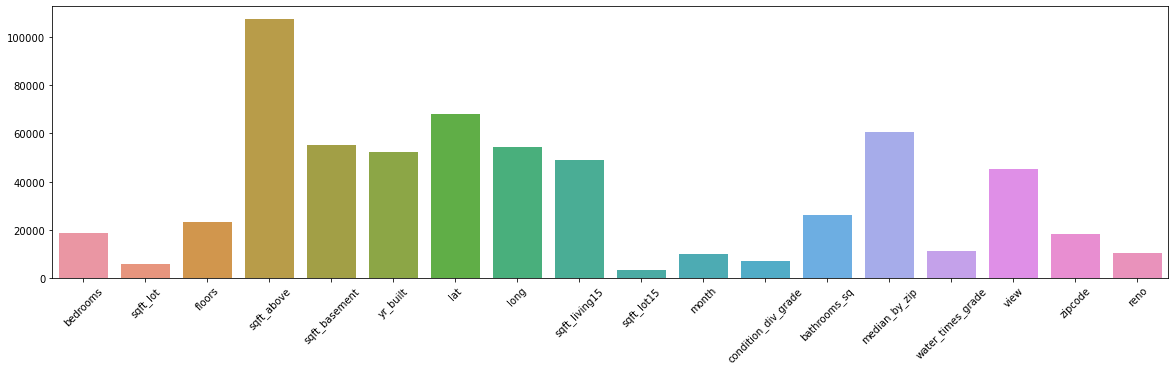

In [16]:

fig, ax = plt.subplots(figsize=(20,5))

len(coef_hist[1].values),len(coef_hist[0].values)

y = abs(coef_hist[1].values)
labels = coef_hist[0].values
ax = sns.barplot(y=y,x=labels)
plt.xticks(rotation=45);

In [17]:
#kbest
# from sklearn.feature_selection import SelectKBest, chi2

In [18]:
# df_ohe = pd.get_dummies(df[categoricals])

# preprocessed = pd.concat([df_cont, df_ohe],axis=1)



# X = preprocessed.drop('price',axis=1)


# imp_mean = SimpleImputer(strategy='mean')
# imp_mean.fit_transform(X)



# scale = StandardScaler()

# X = scale.fit_transform(X)

# X = pd.DataFrame(X)

# y = preprocessed['price']


# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [19]:
# linreg = LinearRegression()

In [20]:
#use the best
#non-negative input?
#X_best = SelectKBest(chi2, k=10).fit_transform(X_train,y_train)
